# 1. Import and Install Dependencies

In [52]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


# 2. Keypoints using MP Holistic

In [53]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [54]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [55]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [56]:
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [57]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [58]:
draw_landmarks(frame, results)

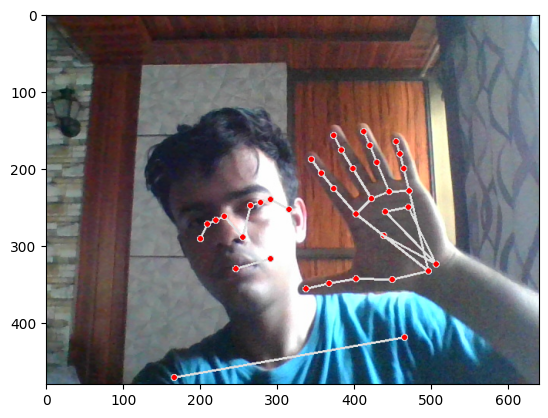

In [59]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [60]:
len(results.left_hand_landmarks.landmark)

21

In [61]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [62]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [63]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [64]:
result_test = extract_keypoints(results)

In [65]:
result_test

array([ 3.98914099e-01,  6.02488697e-01, -8.57609272e-01,  9.99946594e-01,
        4.15300786e-01,  5.18311858e-01, -7.93813169e-01,  9.99900579e-01,
        4.35818583e-01,  5.09142995e-01, -7.93311000e-01,  9.99898076e-01,
        4.55518335e-01,  5.01474321e-01, -7.93323755e-01,  9.99893248e-01,
        3.61283273e-01,  5.46931148e-01, -7.68175781e-01,  9.99908924e-01,
        3.44284773e-01,  5.56405663e-01, -7.66847253e-01,  9.99898791e-01,
        3.27061087e-01,  5.66833556e-01, -7.66820312e-01,  9.99905288e-01,
        4.92917240e-01,  5.27872801e-01, -3.88032943e-01,  9.99887228e-01,
        3.13320339e-01,  6.06409729e-01, -2.35385731e-01,  9.99919415e-01,
        4.55923140e-01,  6.61261678e-01, -7.11787939e-01,  9.99946415e-01,
        3.84406447e-01,  6.89361155e-01, -6.68796360e-01,  9.99931574e-01,
        7.27346182e-01,  8.74669611e-01, -2.14500517e-01,  9.99247849e-01,
        2.59670734e-01,  9.83293235e-01,  2.04938953e-03,  9.97709930e-01,
        1.05846071e+00,  

In [66]:
np.save('0', result_test)

In [67]:
np.load('0.npy')

array([ 3.98914099e-01,  6.02488697e-01, -8.57609272e-01,  9.99946594e-01,
        4.15300786e-01,  5.18311858e-01, -7.93813169e-01,  9.99900579e-01,
        4.35818583e-01,  5.09142995e-01, -7.93311000e-01,  9.99898076e-01,
        4.55518335e-01,  5.01474321e-01, -7.93323755e-01,  9.99893248e-01,
        3.61283273e-01,  5.46931148e-01, -7.68175781e-01,  9.99908924e-01,
        3.44284773e-01,  5.56405663e-01, -7.66847253e-01,  9.99898791e-01,
        3.27061087e-01,  5.66833556e-01, -7.66820312e-01,  9.99905288e-01,
        4.92917240e-01,  5.27872801e-01, -3.88032943e-01,  9.99887228e-01,
        3.13320339e-01,  6.06409729e-01, -2.35385731e-01,  9.99919415e-01,
        4.55923140e-01,  6.61261678e-01, -7.11787939e-01,  9.99946415e-01,
        3.84406447e-01,  6.89361155e-01, -6.68796360e-01,  9.99931574e-01,
        7.27346182e-01,  8.74669611e-01, -2.14500517e-01,  9.99247849e-01,
        2.59670734e-01,  9.83293235e-01,  2.04938953e-03,  9.97709930e-01,
        1.05846071e+00,  

# 4. Setup Folders for Collection

In [68]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello','thanks','no'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [69]:
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    
    # Ensure the action directory exists
    os.makedirs(action_path, exist_ok=True)

    # Get existing sequence numbers (only numeric folders)
    existing_sequences = sorted([
        int(folder) for folder in os.listdir(action_path) if folder.isdigit()
    ])

    # If exactly `no_sequences` exist, skip creating new folders
    if len(existing_sequences) >= no_sequences:
        print(f"✅ {action}: {no_sequences} sequences already exist. Skipping...")
        continue  # Skip this action since all sequences exist

    # Find missing sequences
    missing_sequences = [
        i for i in range(1, no_sequences + 1) if i not in existing_sequences
    ]

    for sequence in missing_sequences:
        seq_path = os.path.join(action_path, str(sequence))
        os.makedirs(seq_path)  # Create missing sequence folder
        print(f"✅ Created folder: {seq_path}")

✅ hello: 30 sequences already exist. Skipping...
✅ thanks: 30 sequences already exist. Skipping...
✅ no: 30 sequences already exist. Skipping...


# 5. Collect Keypoint Values for Training and Testing

In [70]:
# Function to check if data exists
def data_exists(action, sequence, sequence_length, data_path):
    for frame_num in range(sequence_length):
        npy_path = os.path.join(data_path, action, str(sequence), f"{frame_num}.npy")
        if not os.path.exists(npy_path):
            return False  # If any frame data is missing, return False
    return True  # All frame data exists

cap = cv2.VideoCapture(0)
mp_holistic = mp.solutions.holistic

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(start_folder, start_folder + no_sequences):
            if data_exists(action, sequence, sequence_length, DATA_PATH):
                print(f"Skipping {action} - Video {sequence}, data already exists.")
                continue  # Skip data collection if it already exists

            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)

                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy")
                os.makedirs(os.path.dirname(npy_path), exist_ok=True)  # Ensure directory exists
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

cap.release()
cv2.destroyAllWindows()

Skipping hello - Video 1, data already exists.
Skipping hello - Video 2, data already exists.
Skipping hello - Video 3, data already exists.
Skipping hello - Video 4, data already exists.
Skipping hello - Video 5, data already exists.
Skipping hello - Video 6, data already exists.
Skipping hello - Video 7, data already exists.
Skipping hello - Video 8, data already exists.
Skipping hello - Video 9, data already exists.
Skipping hello - Video 10, data already exists.
Skipping hello - Video 11, data already exists.
Skipping hello - Video 12, data already exists.
Skipping hello - Video 13, data already exists.
Skipping hello - Video 14, data already exists.
Skipping hello - Video 15, data already exists.
Skipping hello - Video 16, data already exists.
Skipping hello - Video 17, data already exists.
Skipping hello - Video 18, data already exists.
Skipping hello - Video 19, data already exists.
Skipping hello - Video 20, data already exists.
Skipping hello - Video 21, data already exists.
S

# 6. Preprocess Data and Create Labels and Features

In [71]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pickle

In [72]:
DATA_PATH = "MP_Data"  # Your data folder
label_map_path = r"C:\Users\Shree\Desktop\HSR\label_map.pkl" # Adjusted path

In [73]:
# Load existing label map if available, else create a new one
if os.path.exists(label_map_path):
    with open(label_map_path, 'rb') as f:
        label_map = pickle.load(f)
    print("✅ Loaded existing label map.")
else:
    label_map = {label: num for num, label in enumerate(actions)}
    print("🚀 No label map found. Creating a new one.")

🚀 No label map found. Creating a new one.


In [74]:
# Detect new gestures
existing_actions = set(label_map.keys())
new_actions = set(actions)
added_actions = list(new_actions - existing_actions)

In [75]:
if added_actions:
    print(f"🎯 New gestures detected: {added_actions}")
    for action in added_actions:
        label_map[action] = len(label_map)  # Assign new index

    # Save updated label map
    with open(label_map_path, 'wb') as f:
        pickle.dump(label_map, f)
    print("✅ Updated label map saved!")

In [76]:
actions = np.array(list(label_map.keys()))

In [77]:
# Preprocess Data
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy"))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [78]:
np.array(sequences).shape

(90, 30, 258)

In [79]:
np.array(labels).shape

(90,)

In [80]:
X = np.array(sequences)

In [81]:
X.shape

(90, 30, 258)

In [82]:
y = to_categorical(labels).astype(int)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [84]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model


In [86]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [87]:
model_path = "action.h5"  # Your saved model file

In [88]:
# Check if a trained model exists
if os.path.exists(model_path):
    model = load_model(model_path)
    print("✅ Loaded existing model.")
else:
    print("🚀 No existing model found. Creating a new one.")
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 258)))
    model.add(LSTM(128, return_sequences=True, activation='relu'))
    model.add(LSTM(64, return_sequences=False, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(actions), activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

✅ Loaded existing model.


In [89]:
# Train only if new gestures are added
if added_actions:
    model.fit(X_train, y_train, epochs=1500, callbacks=[tb_callback])
    model.save(model_path)  # Save updated model
    print("✅ Model updated with new gestures.")
else:
    print("🎉 No new gestures detected. Skipping training.")

🎉 No new gestures detected. Skipping training.


In [90]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │        82,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237,253 (926.77 KB)

 Trainable params: 237,251 (926.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# 8. Make Predictions

In [91]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


In [92]:
actions[np.argmax(res[1])]

'no'

In [93]:
actions[np.argmax(y_test[1])]

'no'

# 9. Save Weights

In [94]:
model.save('action.h5')

In [95]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [96]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [97]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [98]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [99]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[1, 0],
        [0, 4]]], dtype=int64)

In [100]:
accuracy_score(ytrue, yhat)

1.0

#11. Test in Real time

In [101]:
from scipy import stats

colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame
from PIL import ImageFont, ImageDraw, Image
from gtts import gTTS
import pygame
import time
import tempfile
import os
import numpy as np
import cv2
import mediapipe as mp

# 1. Initialize Mediapipe and other configs
mp_holistic = mp.solutions.holistic
sequence = []
sentence = []
predictions = []
threshold = 0.3

# Dictionary for English to Hindi translation
translations = {
    "hello": "नमस्ते",
    "yes": "हाँ",
    "thanks": "धन्यवाद",
    "help": "मदद",
    "no": "नहीं"
}

# Load Hindi font (make sure this path exists on your system)
hindi_font_path = r"C:\Windows\Fonts\Mangal.ttf"

# Start webcam
cap = cv2.VideoCapture(0)

# Set Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        translated_word = ""

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            if len(predictions) >= 10 and np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    predicted_word = actions[np.argmax(res)]
                    translated_word = translations.get(predicted_word, predicted_word)

                    if len(sentence) > 0:
                        if predicted_word != sentence[-1]:
                            sentence.append(predicted_word)

                            # Speak in Hindi using pygame
                            tts = gTTS(text=translated_word, lang='hi')
                            temp_path = os.path.join(tempfile.gettempdir(), "temp_hindi_audio.mp3")
                            tts.save(temp_path)

                            pygame.mixer.init()
                            pygame.mixer.music.load(temp_path)
                            pygame.mixer.music.play()
                            while pygame.mixer.music.get_busy():
                                time.sleep(0.1)
                            pygame.mixer.quit()
                            os.remove(temp_path)
                    else:
                        sentence.append(predicted_word)

                        # Speak in Hindi using pygame
                        tts = gTTS(text=translated_word, lang='hi')
                        temp_path = os.path.join(tempfile.gettempdir(), "temp_hindi_audio.mp3")
                        tts.save(temp_path)

                        pygame.mixer.init()
                        pygame.mixer.music.load(temp_path)
                        pygame.mixer.music.play()
                        while pygame.mixer.music.get_busy():
                            time.sleep(0.1)
                        pygame.mixer.quit()
                        os.remove(temp_path)

            # Limit sentence length to last 5 words
            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Convert image to PIL for Hindi text
            image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            draw = ImageDraw.Draw(image_pil)
            font = ImageFont.truetype(hindi_font_path, 32)

            # Draw Hindi translation
            if translated_word:
                draw.text((10, 50), translated_word, font=font, fill=(255, 255, 255))

            # Convert back to OpenCV format
            image = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)

        # Display detected sentence
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━

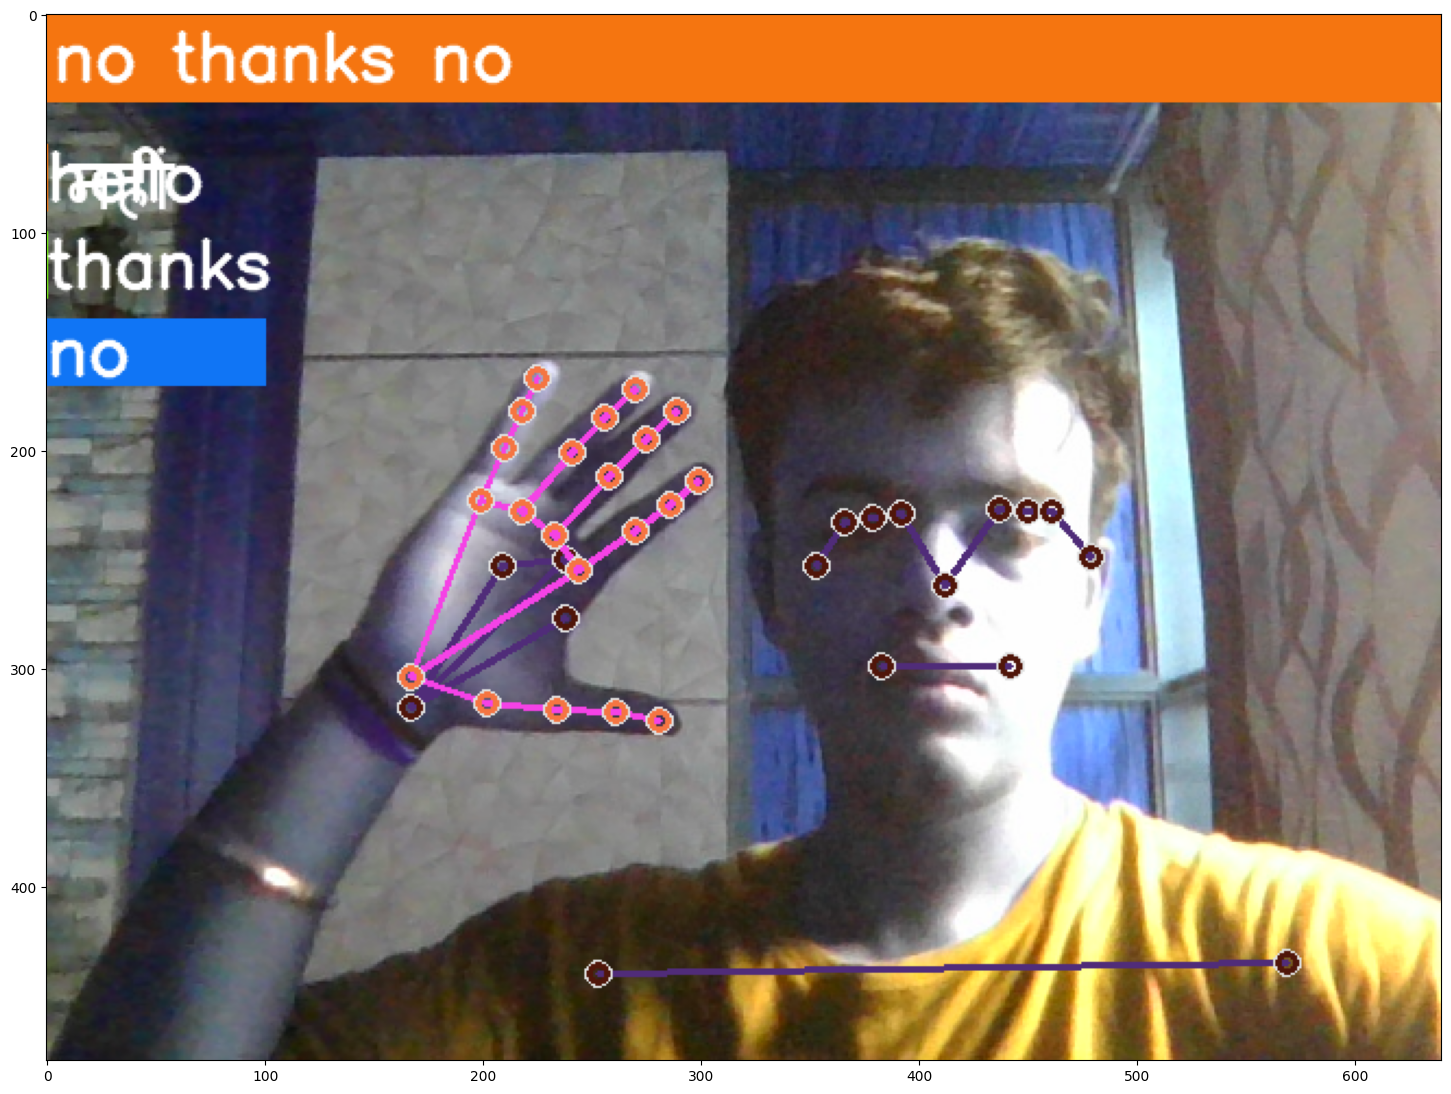

In [102]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))
